# Classificação Linear

Nesse notebook vamos refrescar sua memória sobre equações lineares ao mesmo tempo que te ajudaremos a exergar uma reta como um classificador liear.

**Nota:** Mesmo que você já saiba tudo sobre retasm não pule essa aula! Aqui já damos os primeiros passos para a criação de redes neurais.

## Equação da reta

A equação da reta é aprendida na forma $ax + by + c$, mas para nos adequarmos às nomenclaturas de redes neurais, podemos reescrever essa equação $w_{1}x_{1} + w_{2}x_{2} + b$. Ou seja, $w_{1}$, $w_{2}$ e $b$ são os parâmetros que definem o nosso **modelo linear**, a nossa reta.

Vamos comeãr realizando o plot de uma reta específica: $-1x_{1} + 4x_{2} + 0.4$

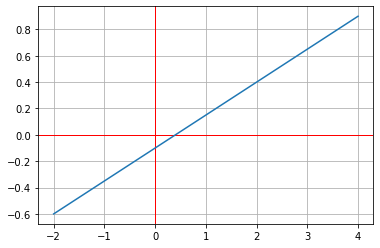

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a = -1
b = 4
c = 0.4

# ax + by + c
# y = (-ax - c) / b

def plotLine(a, b, c):

    x = np.linspace(-2, 4, 50)
    y = (-a * x - c) / b

    plt.axvline(0, -1, 1, color='r', linewidth = 1)
    plt.axhline(0, -2, 4, color='r', linewidth = 1)
    plt.plot(x, y)
    plt.grid(True)

plotLine(a, b, c)

### Solucinando a equação da reta para diferentes pontos

A seguir vamos selecionar três pontos no espaço, e solucionar a equação da reta para esse ponto

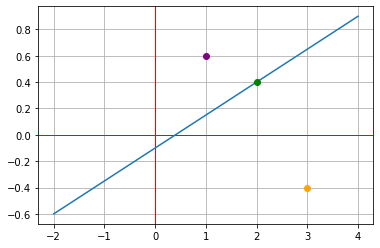

In [2]:
p1 = (2, 0.4)
p2 = (1, 0.6)
p3 = (3, -0.4)

plotLine(a, b, c)
plt.plot(p1[0], p1[1], color = 'green', marker = 'o')
plt.plot(p2[0], p2[1], color = 'purple', marker = 'o')
plt.plot(p3[0], p3[1], color = 'orange', marker = 'o')

In [3]:
# ax + by + c = 0

ret1 = a * p1[0] + b * p1[1] + c
print("ret1 = %.2f" % ret1)
print("")

ret2 = a * p2[0] + b * p2[1] + c
print("ret2 = %.2f" % ret2)
print("")

ret3 = a * p3[0] + b * p3[1] + c
print("ret3 = %.2f" % ret3)

ret1 = 0.00

ret2 = 1.80

ret3 = -4.20


Note que o ponto $\color{green}{p_{1}}$ está na reta, enqquanto $\color{purple}{p_{2}}$ está acima da reta e $\color{orange}{p_{3}}$ abaixo. Ao solucionar a equação da reta para esses três pontos, tivermos respectivamente resultados $\color{green}{nulo (= 0)}$, $\color{purple}{positivo (> 0)}$ e $\color{orange}{negativo (< 0)}$.

Esse comportanmento é consistente para quaisquer pontos na reta, axima ou abaixo dela. Ou seja, se chamarmos a equação da reta de $f(x)$, temos as seguintes regras:

- $\color{green}{f(x) = 0}$ define pontos na reta
- $\color{purple}{f(x) > 0}$ define pontos acima da reta
- $\color{orange}{f(x) < 0}$ define pontos abaixo da reta

## Modelo Linear

Nossa reta pode ser interpretada com um modelo linear, que nada mais é do que uma __função de mapeamente__ $X \to Y$, que mapeia cada ponto em $X$ para um ponto em $Y$. Em outras palavras, dados os parâmetros $W = \{w_{1}, w_{2}\}$ e $b$ de uma reta, é possível mapear um etrar $X = \{x_{1}, x_{2}\}$ para a saída $f(x; W, b)$.

Para problemas de classificação, os valores de $y$ para novas entradas de $x$ vão definir se $x$ é um ponto $\color{red}{acima}$ ou $\color{green}{abaixo}$ da reta, formando portanto um classificador capaz de __separar linearmente problemas com duas classes__.

### Regra Geral

Formalizando a nomenclatura de redes neurais, em duas dimensões $(x_{1}, x_{2})$ nosso modelo linear tem dois **pesos**$(w_{1}, w_{2})$ e um **viés** $b$, que em inglês são chamados de **w**eight e **b**ias.

Em duas dimensões nosso modelo forma uma reta, como vimos anteriormente, para um número de dimensões $d > 2$,  modelos lineares são chamados de **hiperplanos**, e são compostos por:

- um pose $w_{i}$ para cada dimensão $x_{i}$
- um único viés $b$

Exemplo, para 3 dimensões $(x+{1}, x_{2}, x_{3})$ teríamos três pesos $(w_{1}, w_{2}, w_{3})$ e um único viés $b$. Sua função de mapeamento seria $y = w_{1}x_{1} + w_{2}x_{2} + w_{3}x_{3} + b$

De forma geral, define-se que dada uma entrada com $d$ dimensões, a função de mapemaneto de um modelo linnear é 
$$y = \sum_{i = 1}^{d}w_{i}x_{i} + b$$

In [4]:
# y = w1*x1 + w2*x2 + b
# y = w1*x1 + w2*x2 + w3 * x3 + b

### Exercício Sugerido

**Vamos treinar um classificador linear em duas dimensões usando a tecnologia mais avançada que existe: o seu cérebro!**

A célular a seguir produz uma distribuição aleatória para um problema de classificação com duas classes, usando a função ```make_classification()``` do sklearn.

1


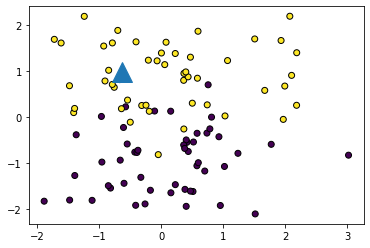

In [33]:
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(30)

X, Y = make_classification(n_features = 2, n_redundant = 0, n_informative = 1, n_clusters_per_class = 1)

plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = Y, edgecolor = "k")

p = X[10]
print(Y[10])
plt.plot(p[0], p[1], marker = '^', markersize = 20)


**Seu trabalho é** encontrar os melhores parâmetros $(W, b)$ de um modelo linear para classificar a distribuição gerada.

O ideal é __não__ fazer por tentativa e erro, mas prestar atenção o impacto de cada mudança realizada. Note que os pesos $W$ são componentes angulares do seu modelo, enuanto o viés $b$ é o componennte linear que desloca a reta no espaço.

8


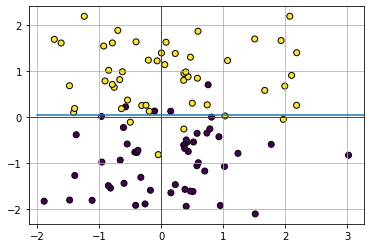

In [72]:
def plotmodel(w1, w2, b):
    
    plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = Y, edgecolor = "k")
     
    xmin, xmax = plt.gca().get_xlim()
    ymin, ymax = plt.gca().get_ylim()
        
    x = np.linspace(-2, 4, 50)
    y = (-w1 * x - c) / w2

    plt.axvline(0, -1, 1, color='r', linewidth = 1)
    plt.axhline(0, -2, 4, color='r', linewidth = 1)
    plt.plot(x, y)
    plt.grid(True)
    
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

         
w1 = 0   #a
w2 = 10    #b
b = -2   #c
                 
plotmodel(w1,w2, b);

p = (-1, 1)
print(w1 * p[0] + w2 * p[1] + b)


Agora podemos utilizar o nosso modelo como um classificador linear com um simples **if** para avaliar a solução da euação da reta apra novos pontos no espaço.

0 blue


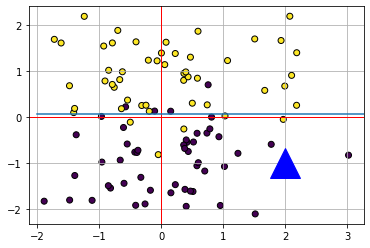

In [66]:
def classify(ponto, w1, w2, b):
    ret = w1 * ponto[0] + w2 * ponto[1] + b
    
    if ret >= 0:
        return 1, "yellow"
    else:
        return 0, "blue"
    
p = (2, -1)
classe, cor = classify(p, w1, w2, b)
print(classe, cor)

plotmodel(w1, w2, b)
plt.plot(p[0], p[1], marker = '^', color = cor, markersize = 30)

De posse da fução `classify()` podemos agora classifcar cada um dos pontos gerados aleatoriamente pelo `make_classification`, calculando assim a acurácia do nosso modelo.

In [73]:
acertos = 0

for k in range(len(X)):
    categ, _ = classify(X[k], w1, w2, b)
    if categ == Y[k]:
        acertos += 1
        
print("Acurácia: {0}" . format(acertos / len(X)))

Acurácia: 0.89
